In [7]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
alxmamaev_flowers_recognition_path = kagglehub.dataset_download('alxmamaev/flowers-recognition')

print('Data source import complete.')


Data source import complete.


In [ ]:
import os
import zipfile

# Define dataset path
zip_path = "/content/flowers-recognition.zip"
extract_path = "/content/data"

# Ensure dataset is extracted
if not os.path.exists(extract_path):
    os.makedirs(extract_path, exist_ok=True)
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)

# Check available directories
extracted_dirs = os.listdir(extract_path)
print("Extracted directories:", extracted_dirs)

# Dynamically determine dataset subfolder
flower_dir = os.path.join(extract_path, "flowers")

# Check if the correct dataset structure exists
if not os.path.exists(flower_dir):
    raise FileNotFoundError(f"Expected dataset directory '{flower_dir}' not found!")

# Automatically create train/validation split if missing
import shutil
from sklearn.model_selection import train_test_split

train_path = os.path.join(flower_dir, "train")
valid_path = os.path.join(flower_dir, "valid")

if not os.path.exists(train_path) or not os.path.exists(valid_path):
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(valid_path, exist_ok=True)

    # Split images into train and validation sets
    categories = os.listdir(flower_dir)
    for category in categories:
        category_path = os.path.join(flower_dir, category)
        if os.path.isdir(category_path):
            images = os.listdir(category_path)
            train_images, valid_images = train_test_split(images, test_size=0.2, random_state=42)

            # Create category folders in train and valid directories
            train_category_path = os.path.join(train_path, category)
            valid_category_path = os.path.join(valid_path, category)
            os.makedirs(train_category_path, exist_ok=True)
            os.makedirs(valid_category_path, exist_ok=True)

            # Move images to respective folders
            for img in train_images:
                shutil.move(os.path.join(category_path, img), os.path.join(train_category_path, img))
            for img in valid_images:
                shutil.move(os.path.join(category_path, img), os.path.join(valid_category_path, img))

print("Dataset successfully prepared for training and validation.")


In [3]:
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d alxmamaev/flowers-recognition


Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 90% 203M/225M [00:00<00:00, 244MB/s]
100% 225M/225M [00:00<00:00, 260MB/s]


In [5]:
import zipfile
import os

zip_path = "/content/flowers-recognition.zip"  # Change this if needed
extract_path = "/content/data"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print(os.listdir(extract_path))  # Check extracted files


['flowers']


# Flower Recognition CNN Keras

## [ Please upvote / star if you like it ;)  ]

In [9]:
import os
print(os.listdir("/content/data/flowers"))

['sunflower', 'dandelion', 'tulip', 'rose', 'daisy']


## CONTENTS ::

[ **1 ) Importing Various Modules**](#content1)

[ **2 ) Preparing the Data**](#content2)

[ **3 ) Modelling**](#content3)

[ **4 ) Evaluating the Model Performance**](#content4)

[ **5 ) Visualizing Predictons on the Validation Set**](#content5)

<a id="content1"></a>
## 1 ) Importing Various Modules.

In [11]:
# ✅ Ignore Warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# ✅ Data visualization & manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# ✅ Configure Matplotlib
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

# ✅ Model selection & preprocessing
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# ✅ Fixed Import: Use tensorflow.keras (instead of keras)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# ✅ Deep Learning Libraries
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop

import tensorflow as tf
import random as rn

# ✅ Image processing libraries
import cv2
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

# ✅ Check TensorFlow & Keras version
print("✅ TensorFlow version:", tf.__version__)


✅ TensorFlow version: 2.18.0


<a id="content2"></a>
## 2 ) Preparing the Data

## 2.1) Making the functions to get the training and validation set from the Images

In [25]:
X = []
Z = []
IMG_SIZE = 150

# Updated paths for Google Colab
FLOWER_DAISY_DIR = "/content/data/flowers/daisy"
FLOWER_SUNFLOWER_DIR = "/content/data/flowers/sunflower"
FLOWER_TULIP_DIR = "/content/data/flowers/tulip"
FLOWER_DANDI_DIR = "/content/data/flowers/dandelion"
FLOWER_ROSE_DIR = "/content/data/flowers/rose"

# Verify if directories exist
import os
print("Dataset contents:", os.listdir("/content/data/flowers"))


Dataset contents: ['sunflower', 'dandelion', 'tulip', 'rose', 'daisy']


In [26]:
def assign_label(img,flower_type):
    return flower_type


In [27]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))




In [28]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:00<00:00, 827.95it/s]

764


In [29]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:01<00:00, 697.32it/s]

1497


In [30]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:01<00:00, 784.96it/s]

2481


In [31]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:01<00:00, 860.81it/s]

3533


In [32]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:01<00:00, 580.04it/s]

4317


## 2.2 ) Visualizing some Random Images

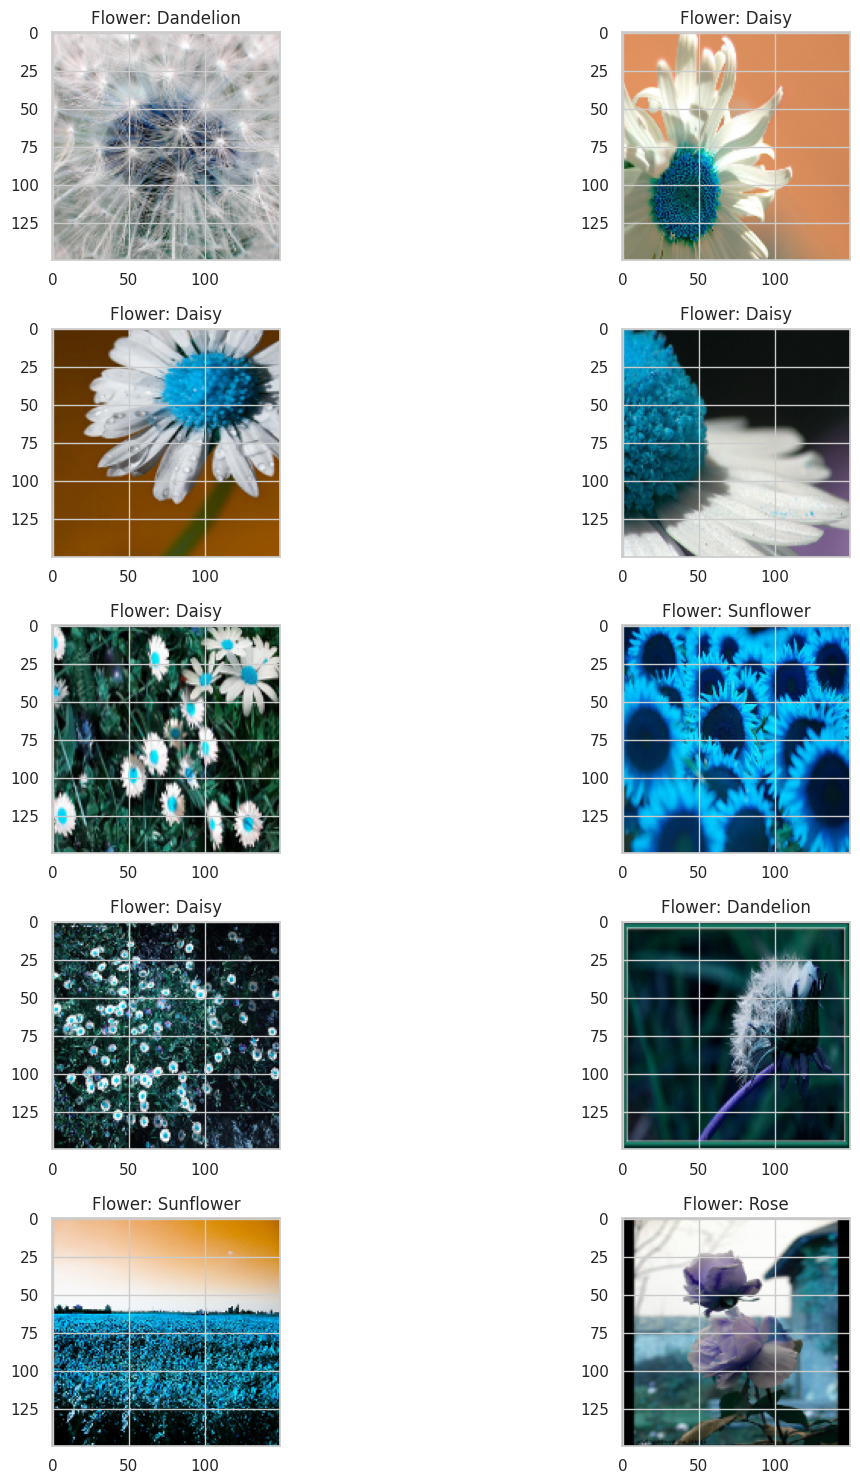

In [33]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])

plt.tight_layout()


## 2.3 ) Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding

In [34]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

## 2.4 ) Splitting into Training and Validation Sets

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


## 2.5 ) Setting the Random Seeds

In [37]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

<a id="content3"></a>
## 3 ) Modelling

## 3.1 ) Building the ConvNet Model

In [38]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

## 3.2 ) Using a LR Annealer

In [39]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

## 3.3 ) Data Augmentation to prevent Overfitting

In [40]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

## 3.4 ) Compiling the Keras Model & Summary

In [42]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7776)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,981,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,143,749 (15.81 MB)

 Trainable params: 4,143,749 (15.81 MB)

 Non-trainable params: 0 (0.00 B)

## 3.5 ) Fitting on the Training set and making predcitons on the Validation set

In [45]:
History = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    verbose=1,
                    steps_per_epoch=len(x_train) // batch_size)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 893ms/step - accuracy: 0.3149 - loss: 1.4834 - val_accuracy: 0.5139 - val_loss: 1.1497
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5234 - loss: 1.2165 - val_accuracy: 0.5389 - val_loss: 1.1135
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 642ms/step - accuracy: 0.5102 - loss: 1.1813 - val_accuracy: 0.5750 - val_loss: 1.0304
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4844 - loss: 1.0594 - val_accuracy: 0.5870 - val_loss: 1.0400
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 644ms/step - accuracy: 0.5522 - loss: 1.0981 - val_accuracy: 0.6019 - val_loss: 1.0088
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6250 - loss: 0.9868 - val_accuracy: 0.6074 - val_loss: 0.9824
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 641ms/step - accuracy: 0.6049 - loss: 0.9750 - val_accuracy: 0.6148 - val_loss: 0.9583
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5547 - loss: 1.1374 - val_accuracy: 0.

<a id="content4"></a>
## 4 ) Evaluating the Model Performance

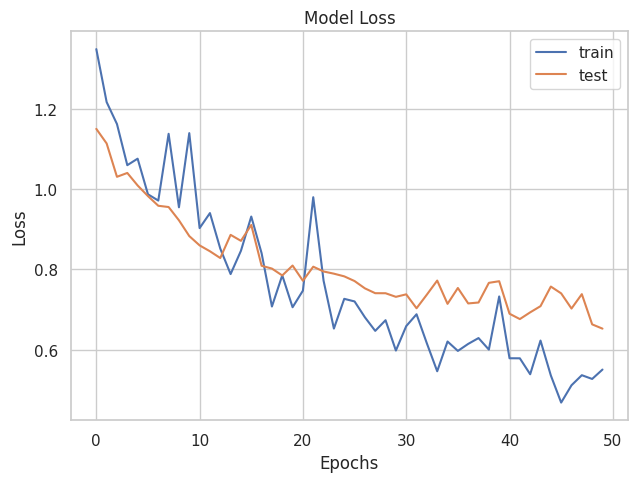

In [46]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

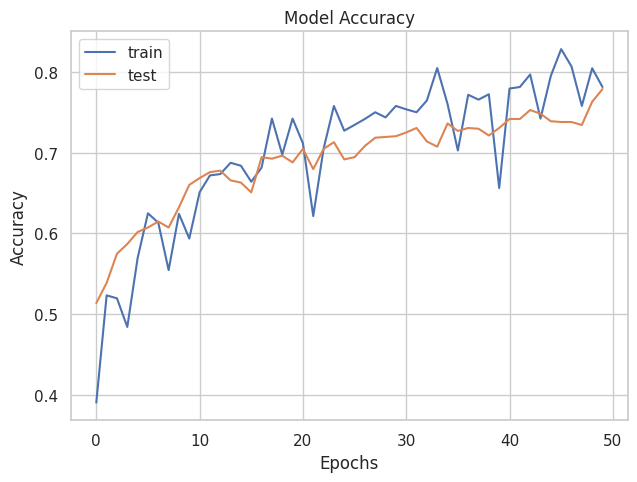

In [48]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


<a id="content5"></a>
## 5 ) Visualizing Predictons on the Validation Set

In [49]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [50]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

#### CORRECTLY CLASSIFIED FLOWER IMAGES

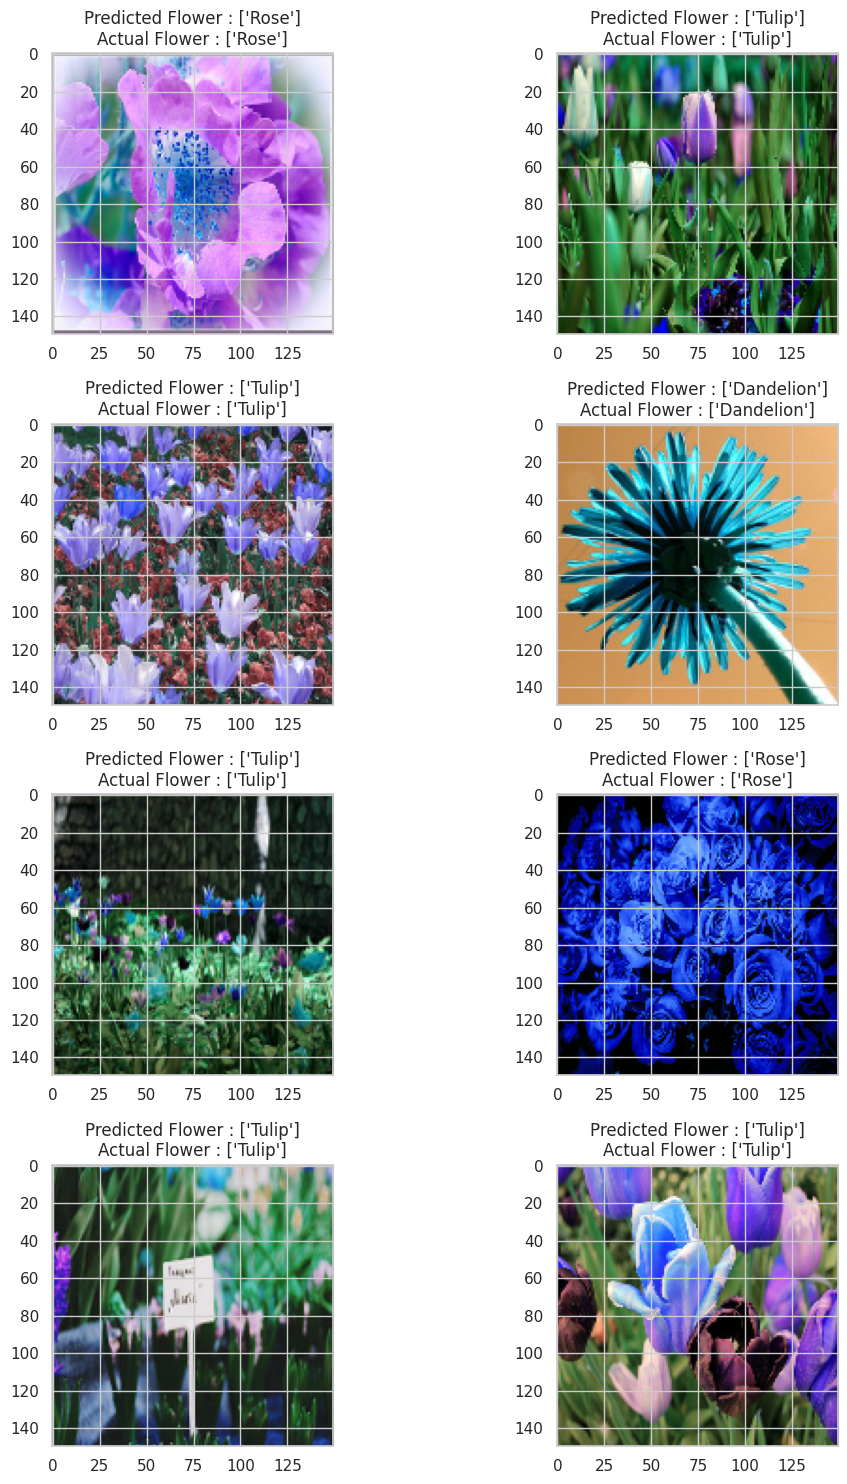

In [54]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+
                  "Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))

        plt.tight_layout()
        count+=1

#### MISCLASSIFIED IMAGES OF FLOWERS

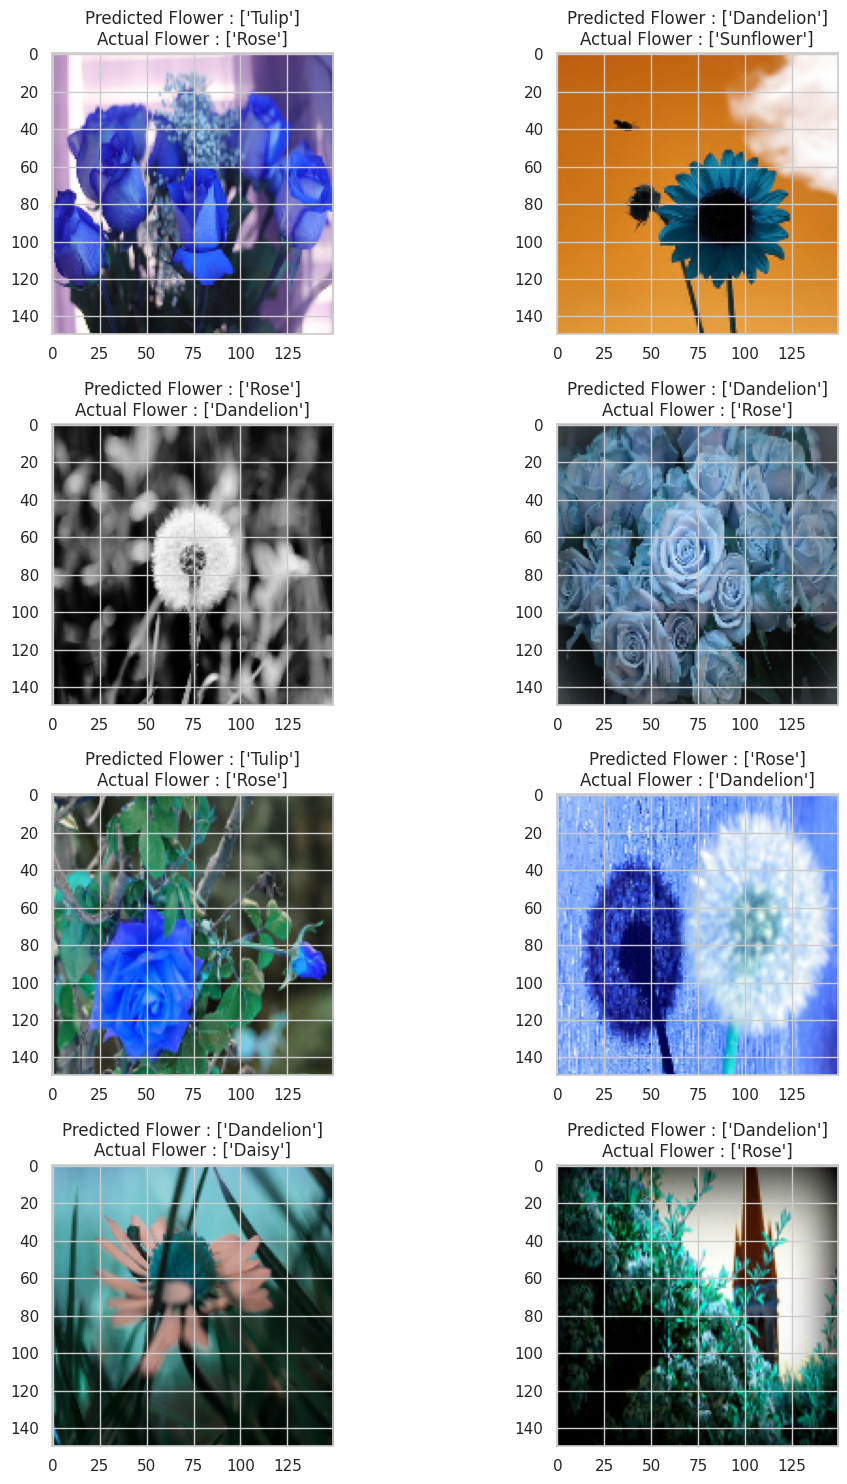

In [56]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+
                  "Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[mis_class[count]])])))

        plt.tight_layout()
        count+=1

#  THE END.

# Fine-Tuning ResNet50 for Flower Recognition


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image parameters
IMG_SIZE = (224, 224)  # ResNet50 expects 224x224 images
BATCH_SIZE = 32
EPOCHS = 10

# Data paths
train_dir = "/content/data/flowers/train"
valid_dir = "/content/data/flowers/valid"

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator
)


In [ ]:
# Save the fine-tuned model
model.save("/content/flower_classification_resnet50.h5")

# Evaluate model performance
loss, accuracy = model.evaluate(valid_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
